In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz

df = pd.read_csv('heart.csv')

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Decision Tree model fitted successfully.


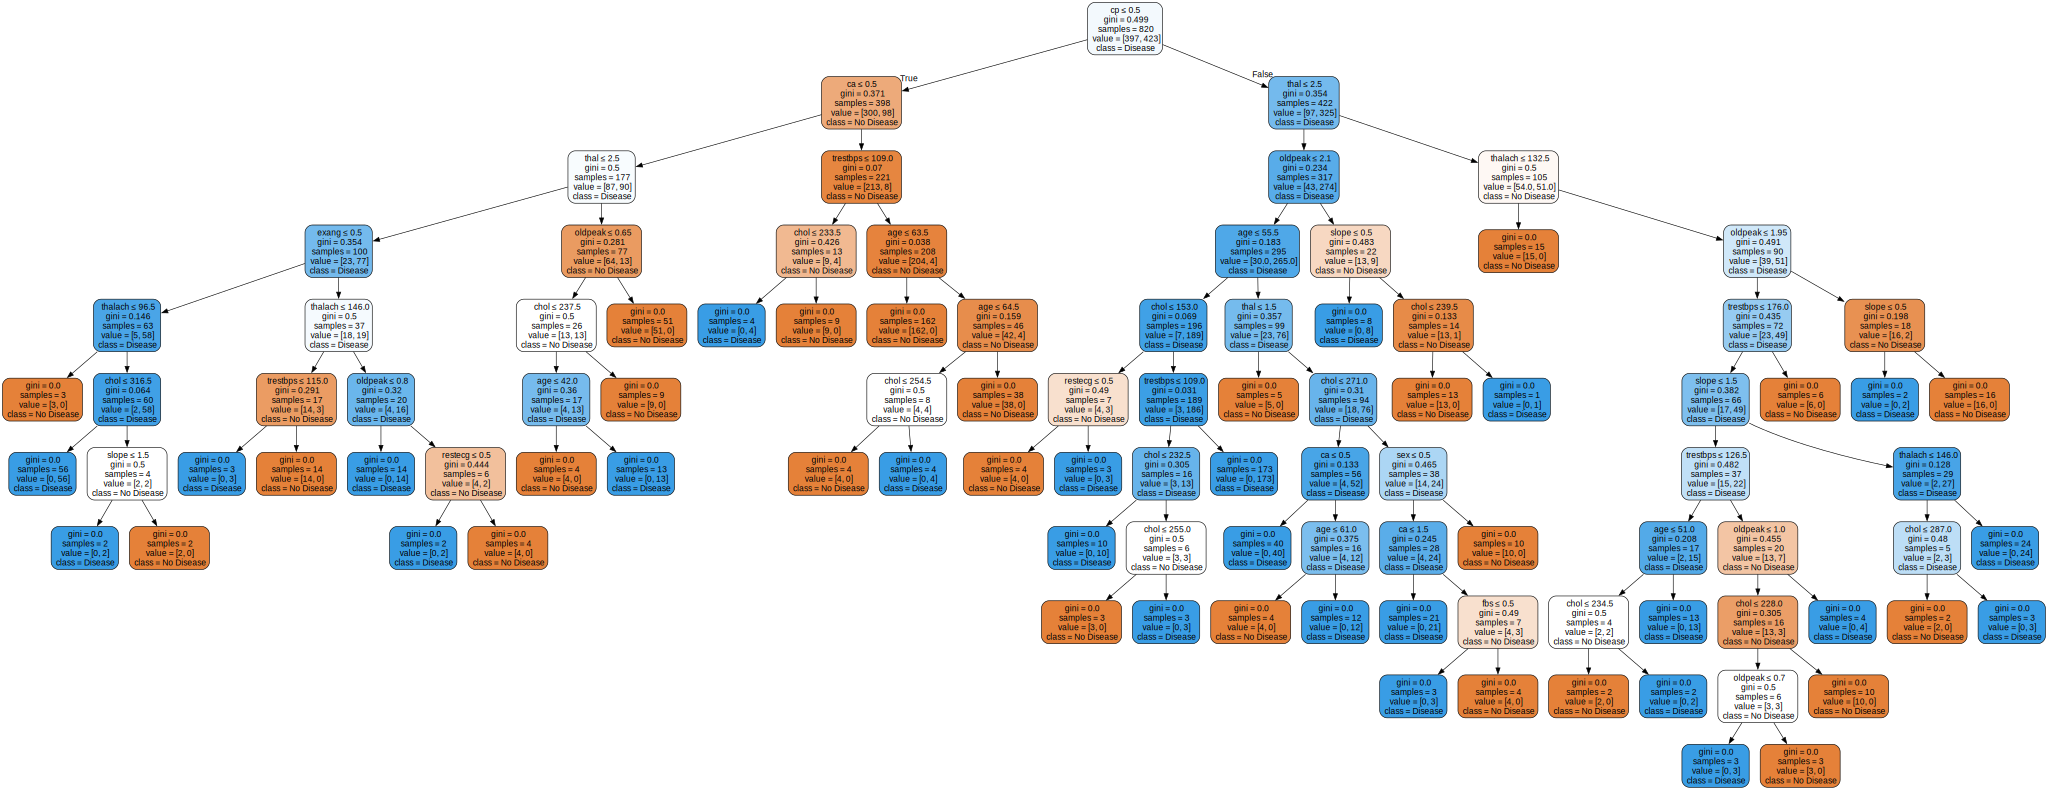

In [2]:
# Preprocessing 
# 0 = no heart disease, 1 = heart disease
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Decision Tree ---
# Create a Decision Tree Classifier instance
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)
print("Decision Tree model fitted successfully.")

# --- Visualize the Tree ---
# This step requires the Graphviz software to be installed and in the system's PATH
try:
    dot_data = export_graphviz(dt_model, out_file=None, 
                               feature_names=X.columns,  
                               class_names=['No Disease', 'Disease'],
                               filled=True, rounded=True,  
                               special_characters=True)

    graph = graphviz.Source(dot_data)
    display(graph)
except Exception as e:
    print(f"Error visualizing tree: {e}")
    print("\nPlease ensure Graphviz is installed and its 'bin' directory is in your system's PATH.")

Accuracy of full-depth Decision Tree: 0.99
Accuracy of pruned (max_depth=4) Decision Tree: 0.80


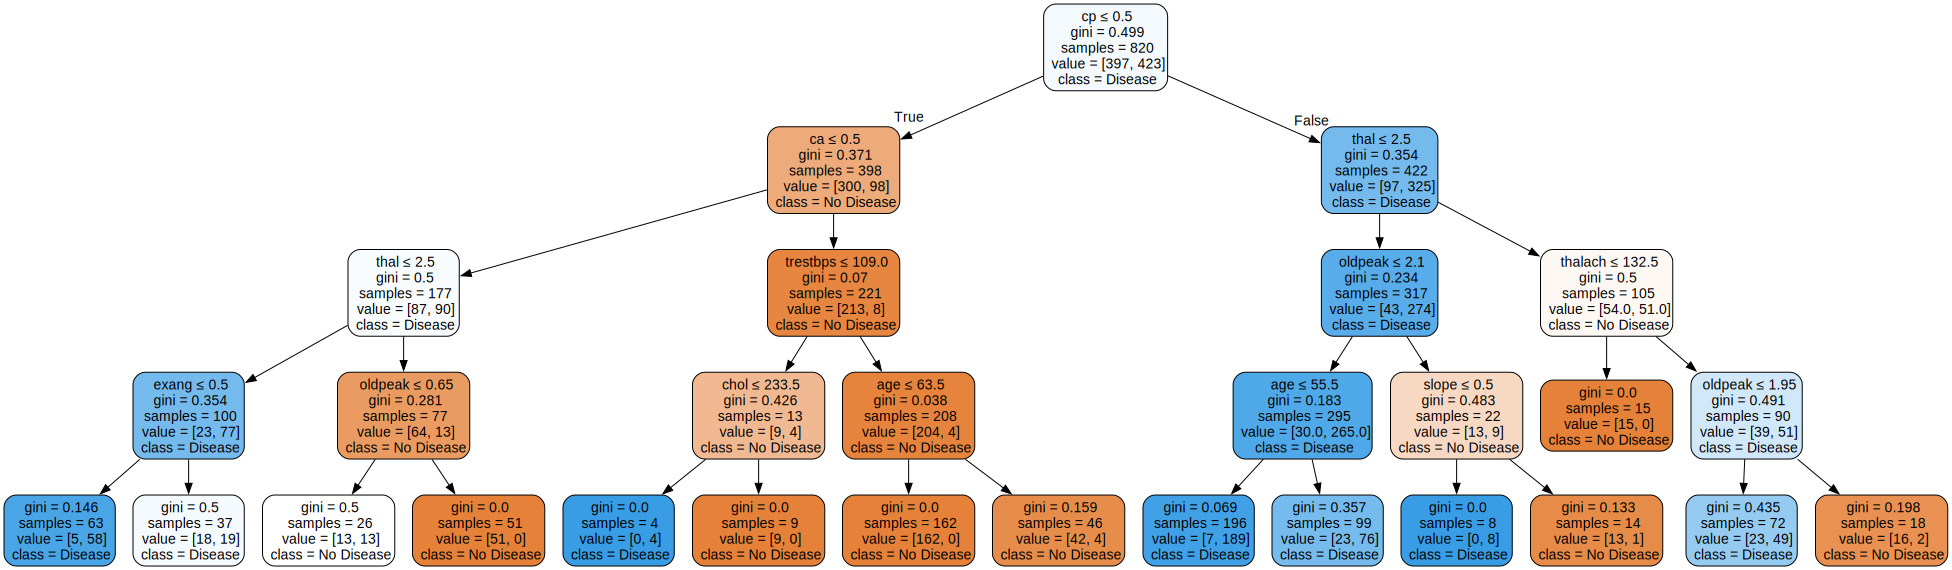

In [3]:
# Evaluate the deep tree (likely overfit)
y_pred_dt_full = dt_model.predict(X_test)
print(f"Accuracy of full-depth Decision Tree: {accuracy_score(y_test, y_pred_dt_full):.2f}")

# Train a new tree with limited depth to prevent overfitting
dt_pruned_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned_model.fit(X_train, y_train)

y_pred_dt_pruned = dt_pruned_model.predict(X_test)
print(f"Accuracy of pruned (max_depth=4) Decision Tree: {accuracy_score(y_test, y_pred_dt_pruned):.2f}")

# Visualize the pruned tree (it will be much smaller and more interpretable)
dot_data_pruned = export_graphviz(dt_pruned_model, out_file=None, 
                                  feature_names=X.columns,  
                                  class_names=['No Disease', 'Disease'],
                                  filled=True, rounded=True,  
                                  special_characters=True)
graph_pruned = graphviz.Source(dot_data_pruned)
display(graph_pruned)

In [4]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model on the TEST data
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy of Pruned Decision Tree on Test Set: {accuracy_score(y_test, y_pred_dt_pruned):.2f}")
print(f"Accuracy of Random Forest on Test Set: {accuracy_score(y_test, y_pred_rf):.2f}")

Accuracy of Pruned Decision Tree on Test Set: 0.80
Accuracy of Random Forest on Test Set: 0.99


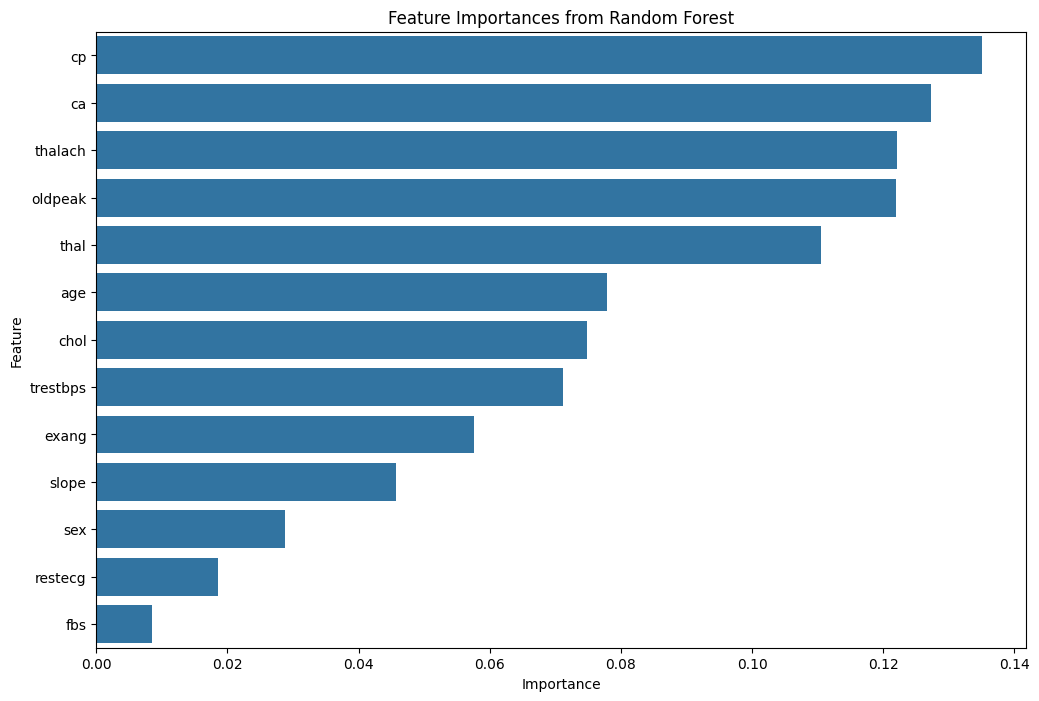

In [5]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
# This will train and test the model 5 times on different splits of the entire dataset
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-Validation Scores for each fold:", cv_scores)
print(f"\nAverage Cross-Validation Score: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Scores: {cv_scores.std():.2f}")

Cross-Validation Scores for each fold: [1.         1.         1.         1.         0.98536585]

Average Cross-Validation Score: 1.00
Standard Deviation of Scores: 0.01
